In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def load_from_file(filename):
    return tf.convert_to_tensor(np.load(filename, allow_pickle = True), dtype=tf.float32)

x       = load_from_file('x.npy')
y       = load_from_file('y.npy')
x_train = load_from_file('x_train.npy')
y_train = load_from_file('y_train.npy')
x_val   = load_from_file('x_val.npy')
y_val   = load_from_file('y_val.npy')

In [3]:
in_size = x.shape[1]
out_size = y.shape[1]

In [4]:
class print_dot(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if epoch % 100 == 0: print('')
        print('.', end='')
    def on_train_end(self, epoch, logs=None):
        print('\nTraining is complete')
        
def print_training_info(history):
    loss = history.history['loss']
    error = history.history['mean_squared_error']
    print('Model loss {0:g}; metric error {1:g}'.format(loss[-1], error[-1]))        

## Q1

In [112]:
# shallow model
shallow_model = tf.keras.Sequential()
shallow_model.add(tf.keras.layers.InputLayer(in_size))
shallow_model.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal'))
shallow_model.add(tf.keras.layers.Dense(out_size, activation='linear'))
shallow_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='mean_squared_error', metrics=['mean_squared_error'])
shallow_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
Total params: 1,072
Trainable params: 1,072
Non-trainable params: 0
_________________________________________________________________


## Q2


....................................................................................................
....................................................................................................
....................................................................................................
Training is complete
Model loss 0.117589; metric error 0.117589


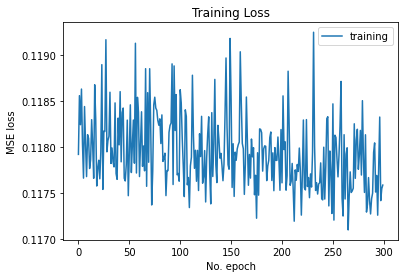

In [119]:
# need to lower lr between training to get loss to plateau, default is 0.001 for Adam
shallow_model.optimizer.learning_rate.assign(0.0001)

# run multiple times with lr lowered as needed
history = shallow_model.fit(x, y, epochs=300, verbose=0, callbacks=[print_dot()])
print_training_info(history)

plt.plot(history.history['loss'], label='training')
plt.title('Training Loss')
plt.ylabel('MSE loss')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

We see final loss plateaus around 0.12 with final learning rate of 0.0001

## Q3

In [120]:
# deep model
deep_model = tf.keras.Sequential()
deep_model.add(tf.keras.layers.InputLayer(in_size))
deep_model.add(tf.keras.layers.Dense(16, activation='relu',kernel_initializer='he_normal'))
deep_model.add(tf.keras.layers.Dense(16, activation='relu',kernel_initializer='he_normal'))
deep_model.add(tf.keras.layers.Dense(out_size, activation='linear'))
deep_model.compile(optimizer=tf.keras.optimizers.Adam(), 
                   loss='mean_squared_error', metrics=['mean_squared_error'])
deep_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
Total params: 816
Trainable params: 816
Non-trainable params: 0
_________________________________________________________________


## Q4


....................................................................................................
....................................................................................................
Training is complete
Model loss 0.0570214; metric error 0.0570214


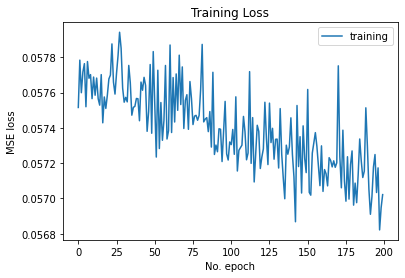

In [128]:
# need to lower lr between training to get loss to plateau, default is 0.001 for Adam
deep_model.optimizer.learning_rate.assign(0.0001)

# run multiple times with lr lowered as needed
history = deep_model.fit(x, y, epochs=200, verbose=0, callbacks=[print_dot()])
print_training_info(history)

plt.plot(history.history['loss'], label='training')
plt.title('Training Loss')
plt.ylabel('MSE loss')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

We see final loss between 0.05 and 0.07 with final learning rate of 0.0001

## Q5
The reason behind the second model having fewer trainable parameters but achieves lower loss is the inclusion of an additional hidden layer, which leads to more non-linearity (from avtivation) and thus better able to learn the non-linear relation among data points.

## Q6
The two distributions are very similar, following approximately an exponentially decaying distribution. Most data points have very norms.

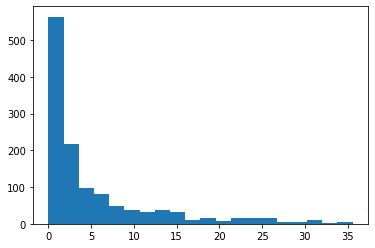

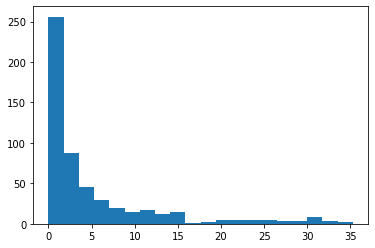

In [5]:
xt_norm = np.linalg.norm(x_train, axis=1)
plt.hist(xt_norm, 20)
plt.show()

xv_norm = np.linalg.norm(x_val, axis=1)
plt.hist(xv_norm, 20)
plt.show()

## Q7

In [207]:
# large model (no reg) to overfit
large_model = tf.keras.Sequential()
large_model.add(tf.keras.layers.InputLayer(in_size))
large_model.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal'))
large_model.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal'))
large_model.add(tf.keras.layers.Dense(out_size, activation='linear'))
large_model.compile(optimizer=tf.keras.optimizers.Adam(), 
                   loss='mean_squared_error', metrics=['mean_squared_error'])
large_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
Total params: 2,128
Trainable params: 2,128
Non-trainable params: 0
_________________________________________________________________


## Q8

In [230]:
large_model.optimizer.learning_rate.assign(0.0001)

history = large_model.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val), 
                          verbose=0, callbacks=[print_dot()])
print_training_info(history)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

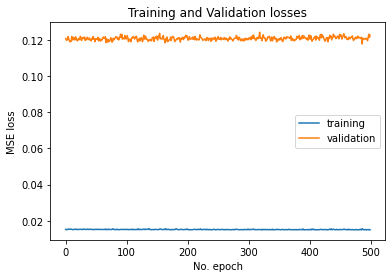

In [231]:
plt.plot(history.history['loss'][-500:], label='training')
plt.plot(history.history['val_loss'][-500:], label='validation')
plt.title('Training and Validation losses')
plt.ylabel('MSE loss')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

With final learning rate of 0.0001, training loss pleateaus to around 0.015, validation loss increases and stablizes around 0.12

In [233]:
large_model.save("overfit.h5", overwrite=True)

## Q9
Phenomenon of validation loss increases while training loss decreases corresponds to overfitting, where the model adapts excessively to the training data, to the point that it learns not only generalizable trends but also noise. The resultant model will perform poorly on data not seen during training, as evident by the increase of validation loss.

## Q10

In [253]:
# model with l2 reg
l2reg = 5e-4
reg = tf.keras.Sequential()
reg.add(tf.keras.layers.InputLayer(in_size))
reg.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(l=l2reg)))
reg.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(l=l2reg)))
reg.add(tf.keras.layers.Dense(out_size, activation='linear',
                              kernel_regularizer=tf.keras.regularizers.l2(l=l2reg)))
reg.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='mean_squared_error', metrics=['mean_squared_error'])
reg.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_20 (Dense)             (None, 16)                528       
Total params: 2,128
Trainable params: 2,128
Non-trainable params: 0
_________________________________________________________________


## Q11

In [286]:
reg.optimizer.learning_rate.assign(0.00005)
hist_reg = reg.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val),
                  verbose=0, callbacks=[print_dot()])
print_training_info(hist_reg)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

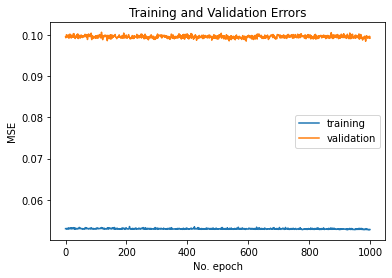

In [287]:
plt.plot(hist_reg.history['mean_squared_error'], label='training')
plt.plot(hist_reg.history['val_mean_squared_error'], label='validation')
plt.title('Training and Validation Errors')
plt.ylabel('MSE')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

With l=5e-4 and final learning rate of 0.00005, training loss and validation loss converged to 0.05 and 0.1, respectively. Generally, l value between 1e-3 and 1e-4 should give good performance. Compared to overfitted model, we see training error increases abut validation error decreases, as expected. With more fine tuning and thorough training the two errors can in fact be quite close, some students trained models with 0.06 and 0.08 losses.

In [17]:
reg = tf.keras.models.load_model("reg.h5")

## Q12
L2 regularization penalizes large magnitude in weights, which is common in overfitted models. Since the inputs are multiplied by the weights, generally speaking, large weights are needed for the model to have excessive oscillation, where a small change in input results in a large change in output.

## Q13
With a sufficiently overfitted model and a well-regularized model, you should see both the output standard deviation and MSE for the overfitted model grow faster than those of the regularized model. Depending on your models, the difference might be more or less exaggerated. Note that both the output standard deviation and MSE for the regularized model do grow as level of noise in input is increased - it would be rather miraculous if a model is completely "immune" to input noise. It is the differnce in growth rate between the two models that show the regularized one is more robust to perturbation in input.

In [13]:
large_model = tf.keras.models.load_model("overfit.h5")
reg = tf.keras.models.load_model("reg.h5")

large_model.evaluate(x_train, y_train)
large_model.evaluate(x_val, y_val)

reg.evaluate(x_train, y_train)
reg.evaluate(x_val, y_val)

538/538 [==============================] - 0s 24us/sample - loss: 0.1329 - mean_squared_error: 0.0992


[0.1328772048303186, 0.099170834]

In [14]:
mu_noise = 0
sig_noise = [x/10 for x in range(0, 6, 1)]
num_run_per_level = 10

std_of = np.zeros(len(sig_noise))
std_reg = np.zeros(len(sig_noise))
error_of = np.zeros(len(sig_noise))
error_reg = np.zeros(len(sig_noise))
for i in range(len(sig_noise)):
    for _ in range(num_run_per_level):
        noise = np.random.normal(mu_noise, sig_noise[i], size=x_val.shape)
        x_noise = x_val + noise

        y_noise = reg.predict(x_noise)
        std_reg[i] += np.std(y_noise)
        error_reg[i] += reg.evaluate(x_noise, y_val, verbose=0)[1]

        y_noise = large_model.predict(x_noise)
        std_of[i] += np.std(y_noise)
        error_of[i] += large_model.evaluate(x_noise, y_val, verbose=0)[1]
std_of /= num_run_per_level
std_reg /= num_run_per_level
error_of /= num_run_per_level
error_reg /= num_run_per_level

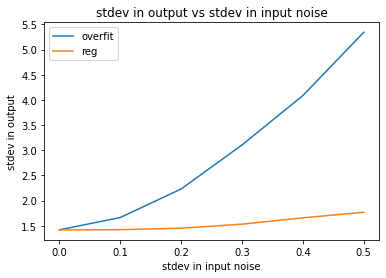

In [15]:
plt.plot(sig_noise, std_of, label="overfit")
plt.plot(sig_noise, std_reg, label="reg")
plt.xlabel('stdev in input noise')
plt.ylabel('stdev in output')
plt.title('stdev in output vs stdev in input noise')
plt.legend()
plt.show()

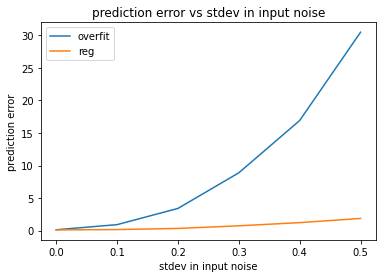

In [16]:
plt.plot(sig_noise, error_of, label="overfit")
plt.plot(sig_noise, error_reg, label="reg")
plt.xlabel('stdev in input noise')
plt.ylabel('prediction error')
plt.title('prediction error vs stdev in input noise')
plt.legend()
plt.show()

## Q14

In [17]:
num_province = 32
data_per_province = int(x.shape[0] / num_province)
provinces = ['Anhui','Beijing','Chongqing','Fujian','Gansu','Guangdong','Guangxi','Guizhou','Hainan','Hebei','Heilongjiang','Henan','Hong Kong','Hunan','Inner Mongolia','Jiangsu','Jiangxi','Jilin','Liaoning','Macau','Ningxia','Qinghai','Shaanxi','Shandong','Shanghai','Shanxi','Sichuan', 'Tianjin','Tibet','Xinjiang','Yunnan','Zhejiang']
scale = 100

def plot_data(y, y_pred, day, province=-1, title=None):
    '''
    Function to plot time series data
    y: true data
    y_pred: prediction by model
    day: which day in the prediction data to plot, corresponds to column index in y_pred
    province: specify a province with a non-negative value, negative value plots all provinces
    title: specify a title for the plot
    '''
    if province >= num_province:
        raise Exception("province index out of range")
    if province>=0:
        y1 = y[province*data_per_province:(province+1)*data_per_province, day] * scale
        y2 = y_pred[province*data_per_province:(province+1)*data_per_province, day] * scale
    else:
        y1 = y[:, day] * scale
        y2 = y_pred[:, day] * scale
        prov_text = "All"
    plt.figure(figsize=(16, 8))
    plt.plot(y1, label="true")
    plt.plot(y2, label="prediction")
    plt.xlabel("Days")
    plt.ylabel("Number of Active Cases")
    if title:
        plt.title(title)
    else:
        plt.title("True and {} Day Prediction for {} Province".format(day+1, provinces[province]))
    plt.legend()
    plt.show()

In [18]:
y_pred = reg.predict(x)

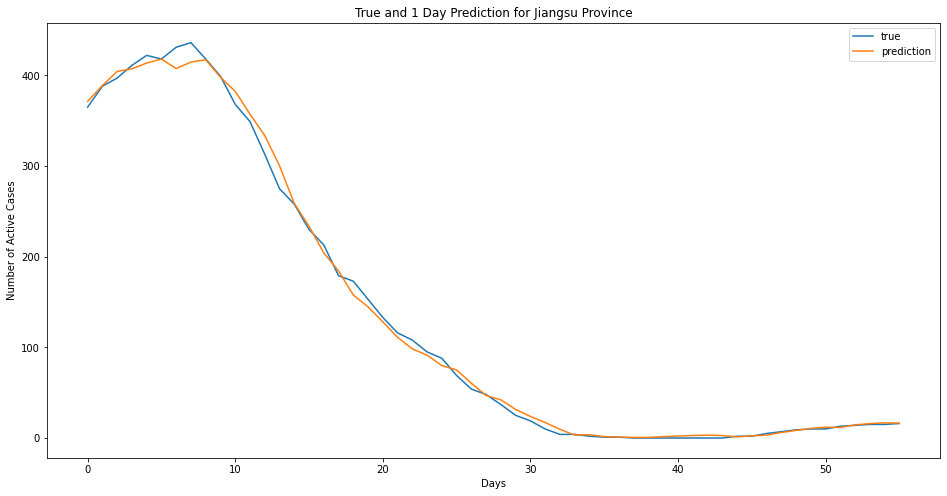

In [19]:
plot_data(y, y_pred, 0, 15)

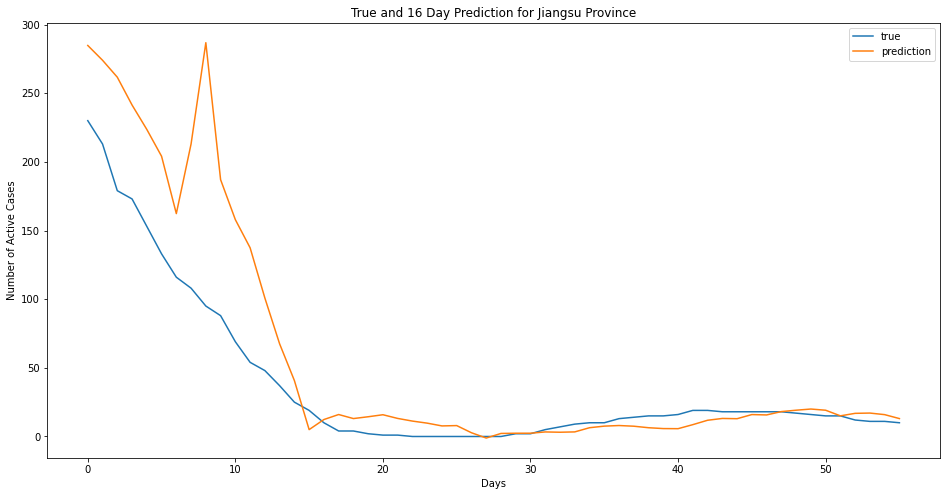

In [20]:
plot_data(y, y_pred, 15, 15)

Prediction quality deteriorates as the day argument is increased. Intuitively, this is because making prediction further into the future is more difficult.

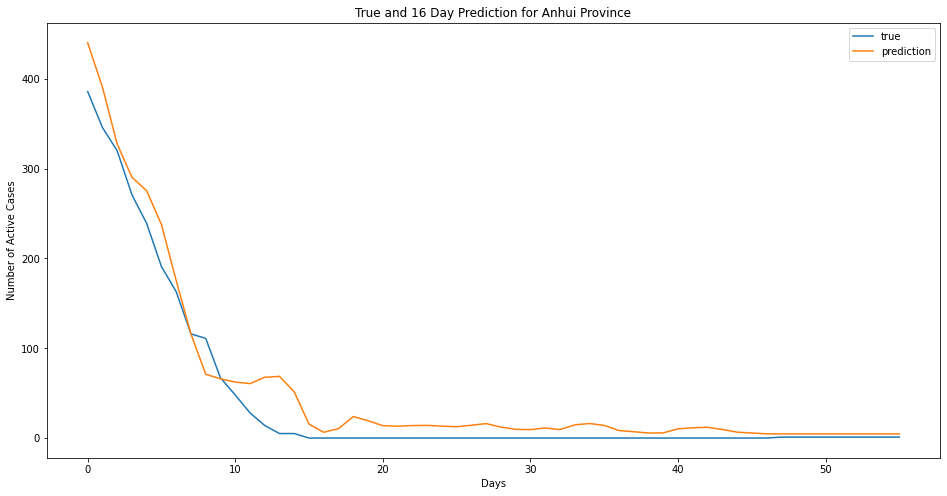

In [36]:
plot_data(y, y_pred, 15, 0)

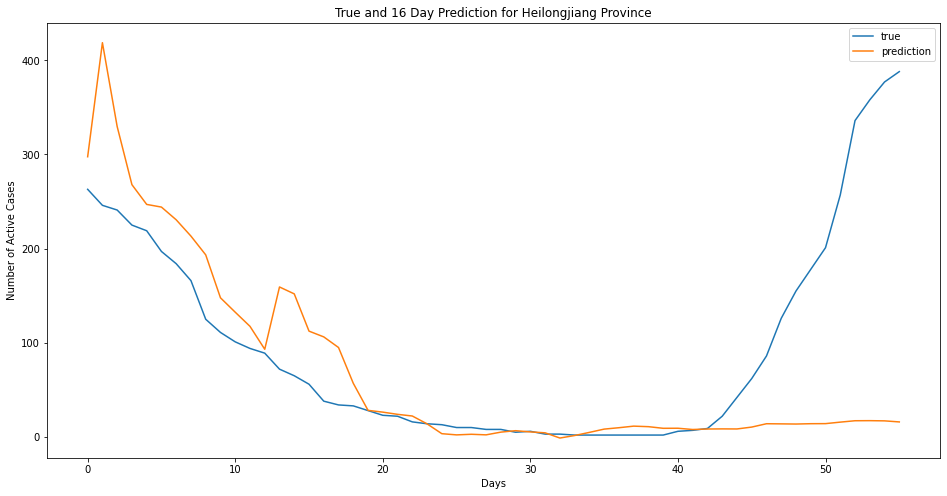

In [25]:
plot_data(y, y_pred, 15, 10)

The two plots above show that the 16th day prediction for Anhui is noticiably better than that of Heilongjiang. One possibility for the difference is that the time series of Anhui follows a simpler trend that is common across majority of the provinces, while the trend of Heilongjiang is much more rare (having a second spike towards the end). As a result, the model is better at predicting the simpler, more common trend in training data.

## Q15
The errors are orders of magnitudes larger when evaluated on the U.S. data. This is expected since the factors underlying the pandemic development, such as population density, healthcare system, govermental response, etc., are very differeny across the two countries, and thus should result in very different trends in active cases. Our models are only trained on the Chinese dataset and understanbly fails to make accurate prediction for the U.S.

It is thus important that we use a training set whose distribution is representative of the desired task; and so does our test set, so that we can make informative evaluation of our models

In [37]:
x_us = load_from_file("x_us.npy")
y_us = load_from_file("y_us.npy")
x_us /= 100
y_us /= 100

In [38]:
reg.evaluate(x_us, y_us)

55/55 [==============================] - 0s 54us/sample - loss: 828326.8793 - mean_squared_error: 828326.8125


[828326.8792613636, 828326.8]

In [39]:
large_model.evaluate(x_us, y_us)

55/55 [==============================] - 0s 59us/sample - loss: 1121171.4528 - mean_squared_error: 1121171.5000


[1121171.4528409091, 1121171.5]